# K-Means Clustering with Elbow Method
This notebook demonstrates K-Means clustering on the Iris dataset, using the **Elbow Method** to find the optimal number of clusters.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1. Load and Preprocess Data

In [2]:
# Load the dataset
df = pd.read_csv('iris.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (150, 5)

First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Select the features to use for clustering
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

# Scale the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled successfully!")
print(f"Scaled data shape: {X_scaled.shape}")

Features scaled successfully!
Scaled data shape: (150, 4)


## 2. Elbow Method - Finding Optimal K

The **Elbow Method** helps us find the optimal number of clusters by:
1. Running K-Means for K = 1 to 10
2. Calculating **WCSS** (Within-Cluster Sum of Squares) for each K
3. Plotting WCSS vs K and finding the "elbow" point

**WCSS** = Sum of squared distances between each point and its cluster centroid

In [4]:
# Calculate WCSS for different values of K
wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)  # Test K from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS
    print(f"K = {k}: WCSS = {kmeans.inertia_:.2f}")

K = 1: WCSS = 600.00
K = 2: WCSS = 223.73
K = 3: WCSS = 140.97
K = 4: WCSS = 114.62
K = 5: WCSS = 91.30
K = 6: WCSS = 81.76
K = 7: WCSS = 71.32
K = 8: WCSS = 62.65
K = 9: WCSS = 55.26
K = 10: WCSS = 50.62


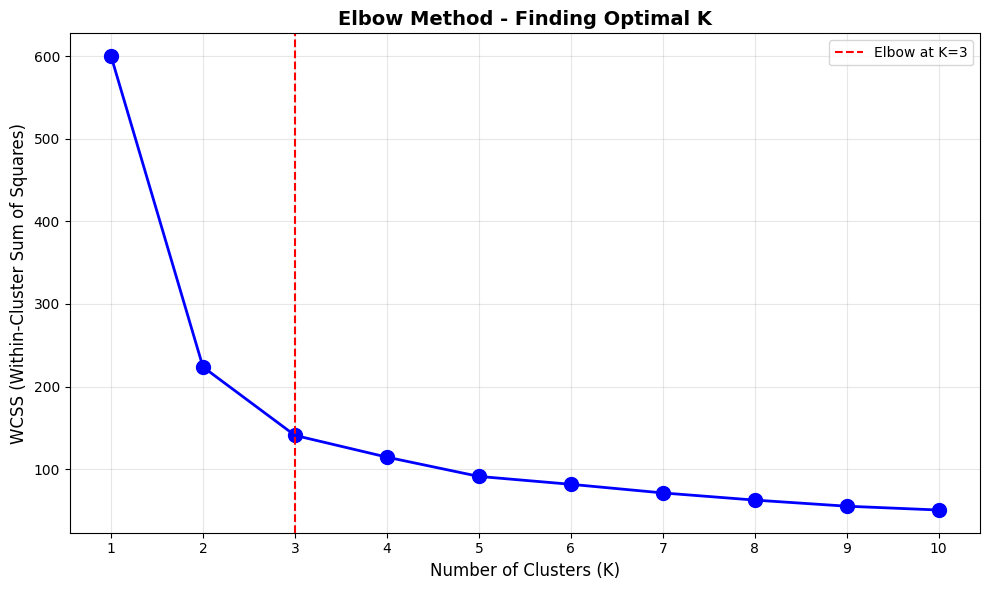


📌 The 'elbow' appears at K=3, suggesting 3 clusters is optimal!


In [5]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method - Finding Optimal K', fontsize=14, fontweight='bold')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)

# Highlight the elbow point (K=3 for Iris dataset)
plt.axvline(x=3, color='red', linestyle='--', label='Elbow at K=3')
plt.legend()
plt.tight_layout()
plt.show()

print("\n📌 The 'elbow' appears at K=3, suggesting 3 clusters is optimal!")

## 3. Apply K-Means with Optimal K

In [6]:
# Apply K-Means with the optimal number of clusters
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"K-Means applied with K = {optimal_k}")
print(f"\nCluster distribution:")
print(df['cluster'].value_counts().sort_index())

K-Means applied with K = 3

Cluster distribution:
cluster
0    53
1    50
2    47
Name: count, dtype: int64


## 4. Visualize the Clusters

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5100\3337347124.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


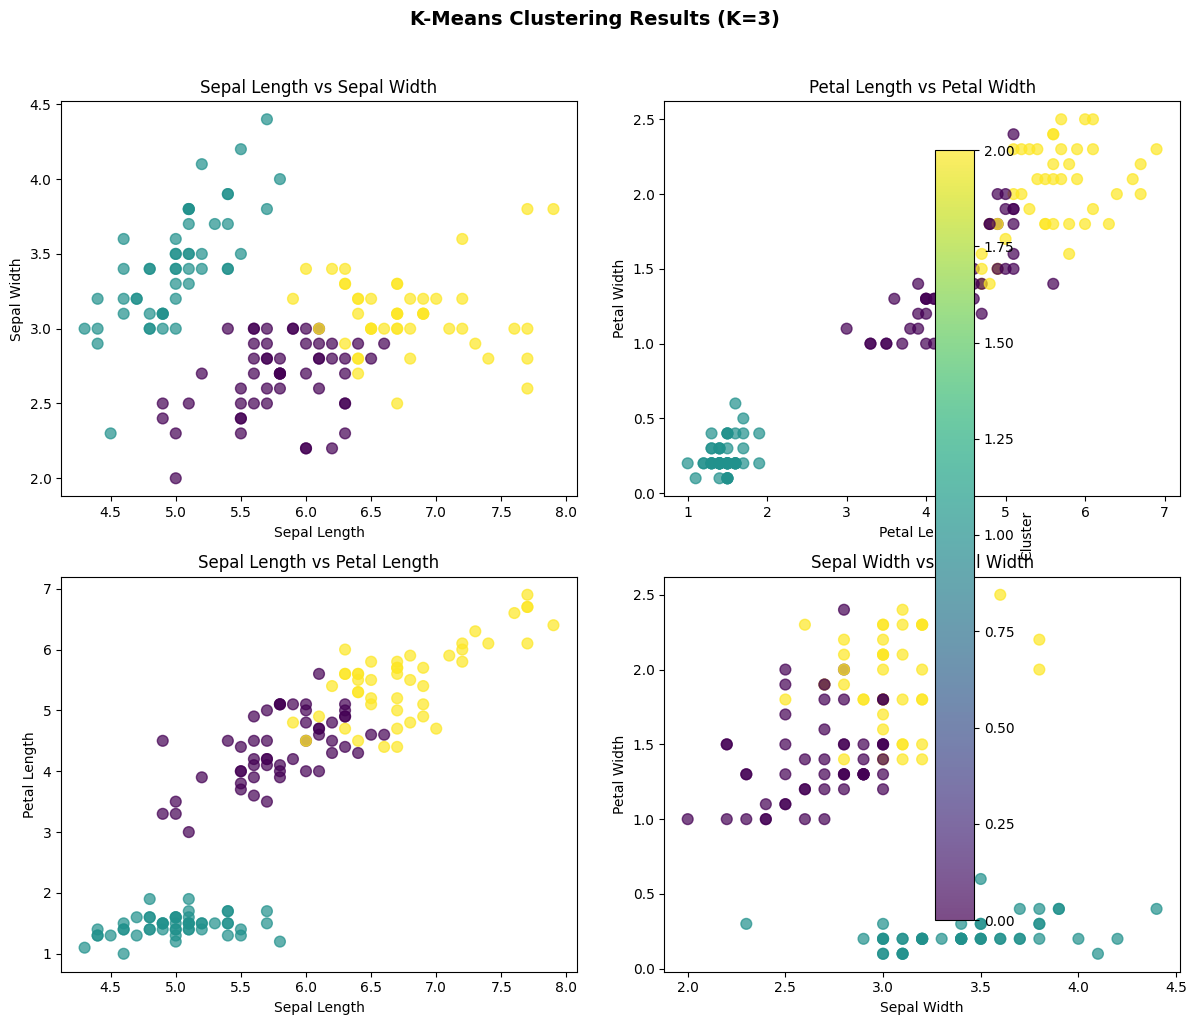

In [7]:
# Create a 2x2 subplot for different feature combinations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define colors for clusters
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Plot 1: Sepal Length vs Sepal Width
scatter1 = axes[0, 0].scatter(df['sepal_length'], df['sepal_width'], 
                               c=df['cluster'], cmap='viridis', s=60, alpha=0.7)
axes[0, 0].set_xlabel('Sepal Length')
axes[0, 0].set_ylabel('Sepal Width')
axes[0, 0].set_title('Sepal Length vs Sepal Width')

# Plot 2: Petal Length vs Petal Width
scatter2 = axes[0, 1].scatter(df['petal_length'], df['petal_width'], 
                               c=df['cluster'], cmap='viridis', s=60, alpha=0.7)
axes[0, 1].set_xlabel('Petal Length')
axes[0, 1].set_ylabel('Petal Width')
axes[0, 1].set_title('Petal Length vs Petal Width')

# Plot 3: Sepal Length vs Petal Length
scatter3 = axes[1, 0].scatter(df['sepal_length'], df['petal_length'], 
                               c=df['cluster'], cmap='viridis', s=60, alpha=0.7)
axes[1, 0].set_xlabel('Sepal Length')
axes[1, 0].set_ylabel('Petal Length')
axes[1, 0].set_title('Sepal Length vs Petal Length')

# Plot 4: Sepal Width vs Petal Width
scatter4 = axes[1, 1].scatter(df['sepal_width'], df['petal_width'], 
                               c=df['cluster'], cmap='viridis', s=60, alpha=0.7)
axes[1, 1].set_xlabel('Sepal Width')
axes[1, 1].set_ylabel('Petal Width')
axes[1, 1].set_title('Sepal Width vs Petal Width')

# Add colorbar
plt.colorbar(scatter4, ax=axes, label='Cluster')
plt.suptitle('K-Means Clustering Results (K=3)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 5. Cluster Analysis

In [8]:
# Analyze cluster characteristics
print("=" * 50)
print("CLUSTER CHARACTERISTICS")
print("=" * 50)

cluster_summary = df.groupby('cluster')[features].mean()
print("\nMean values for each cluster:")
print(cluster_summary.round(2))

print("\n" + "=" * 50)
print("INSIGHTS")
print("=" * 50)
for cluster in range(optimal_k):
    print(f"\n🔹 Cluster {cluster}:")
    cluster_data = cluster_summary.loc[cluster]
    print(f"   - Sepal: {cluster_data['sepal_length']:.1f}L x {cluster_data['sepal_width']:.1f}W")
    print(f"   - Petal: {cluster_data['petal_length']:.1f}L x {cluster_data['petal_width']:.1f}W")

CLUSTER CHARACTERISTICS

Mean values for each cluster:
         sepal_length  sepal_width  petal_length  petal_width
cluster                                                      
0                5.80         2.67          4.37         1.41
1                5.01         3.42          1.46         0.24
2                6.78         3.10          5.51         1.97

INSIGHTS

🔹 Cluster 0:
   - Sepal: 5.8L x 2.7W
   - Petal: 4.4L x 1.4W

🔹 Cluster 1:
   - Sepal: 5.0L x 3.4W
   - Petal: 1.5L x 0.2W

🔹 Cluster 2:
   - Sepal: 6.8L x 3.1W
   - Petal: 5.5L x 2.0W
